# Phase 4 Project Submission

- Student name: Lucas Wilkerson
- Student pace: Flex/part time
- Scheduled project review date/time:
- Instructor name: Morgan Jones


# Pneumonia Detection and Classification

## Project Overview

For this project, the aim is to build a model for image classification that can classify whether a patient has pneumonia when provided a chest x-ray image. 


## Business Problem and Stakeholder

A healthcare physician group is looking to improve their patient outcomes, specifically patients who are being diagnosed with pneumonia. Pneumonia is a significant health concern among patients, especially geriatric and pediatric patients. For effective treatment and the best possible outcomes, early detection and diagnosis is crucial. Current methods for diagnosing pneumonia can be time-consuming and can be prone to error. Through the development and use of method such as image classification and deep learning, we may be able to improve this process which can lead to an increase in early accurate identification and as a result improve patient outcomes.




## Data Understanding

The dataset used for this project contains chest X-ray images from pediatric patients with or without pneumonia who are ages one to five who. The dataset is already separated and organized into three groups:

- Train: data used for training the model
- Test: data used for testing and evaluating the model's performance 
- Validation: data used during the training process to help tune the model



## Data Preparation/ Preprocessing

To start the preparation and preprocessing phase, the necessary packages will be imported for this project. Next a directory path will be made to each of the three dataset groups: training data, test data, validation data. The images will be loaded and also rescaled. 

Data augmentation will also be utilized to help decrease the likely-hood of the model overfitting and increase the chances of the model being able to generalize on unseen data.

In [ ]:
#Start by building a baseline neural network

# Don't for get to check distribution, check for duplicates, nans
# get statistics if needed/useful 

In [1]:
#importing necessary packages

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
import numpy as np
import os


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.datasets import mnist
#may not need mnist
from keras.optimizers import Adam
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # This prevents kernel shut down due to xgboost conflict
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # This line prevents tf's comments about the optimizing your machine

In [1]:
#importing necessary packages

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
import numpy as np
import os


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.datasets import mnist
#may not need mnist
from keras.optimizers import Adam
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # This prevents kernel shut down due to xgboost conflict
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # This line prevents tf's comments about the optimizing your machine

In [2]:
# Directory path
train_dir = 'chest_xray/train/'
test_dir = 'chest_xray/test/'
val_dir = 'chest_xray/val/'

# Preprocessing the data
# Rescale the data by 1/.255 and use binary_crossentropy loss

# Data Augmentation will be performed only on the training set
# All image sets will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=20, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Get all the data in the directory chest_xray/train (5216 images) and reshape them
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150), batch_size=5216, class_mode='binary')

# Get all the data in the directory chest_xray/test (624 images) , and reshape them
test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size=(150, 150), batch_size=624, class_mode='binary')


# Get all the data in the directory chest_xray/val (16 images), and reshape them
val_generator = val_datagen.flow_from_directory(
        val_dir, 
        target_size=(150, 150), batch_size=16, class_mode='binary')

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [3]:
# Get the counts for each class in the training set
train_class_counts = np.bincount(train_labels.astype(int))
train_class_counts_dict = dict(zip(range(len(train_class_counts)), train_class_counts))
print("Training Set Class Counts:", train_class_counts_dict)

# Get the counts for each class in the test set
test_class_counts = np.bincount(test_labels.astype(int))
test_class_counts_dict = dict(zip(range(len(test_class_counts)), test_class_counts))
print("Test Set Class Counts:", test_class_counts_dict)

# Get the counts for each class in the validation set
val_class_counts = np.bincount(val_labels.astype(int))
val_class_counts_dict = dict(zip(range(len(val_class_counts)), val_class_counts))
print("Validation Set Class Counts:", val_class_counts_dict)

Training Set Class Counts: {0: 1341, 1: 3875}
Test Set Class Counts: {0: 234, 1: 390}
Validation Set Class Counts: {0: 8, 1: 8}


## Data Analysis/ Data Visualization

### Class Distribution

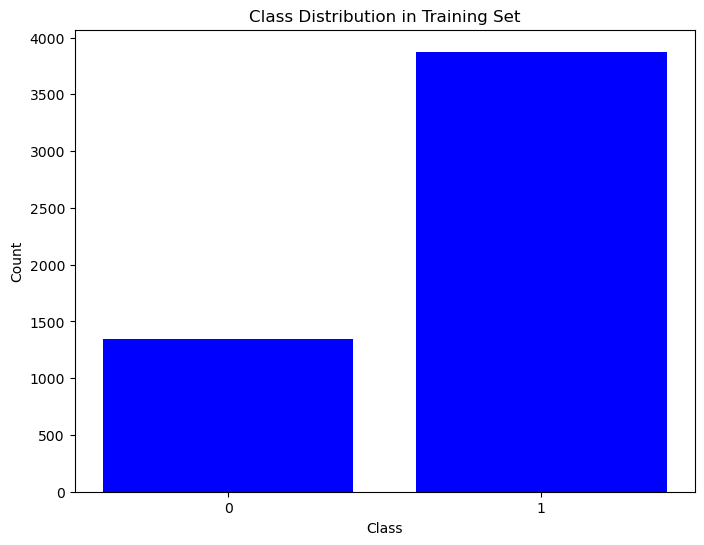

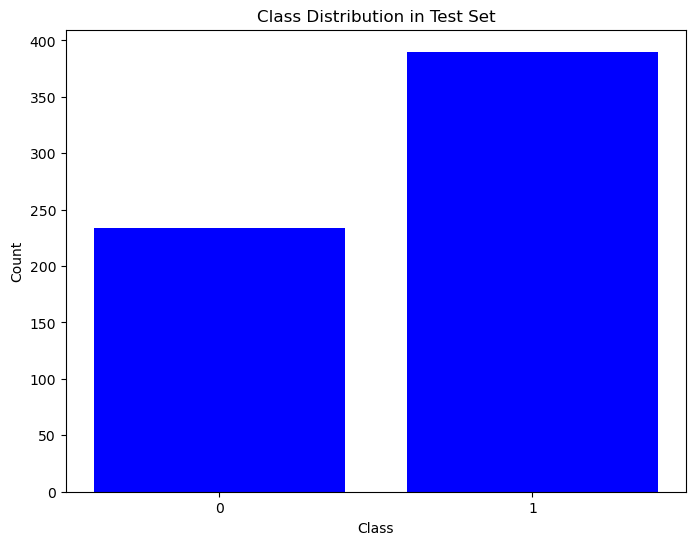

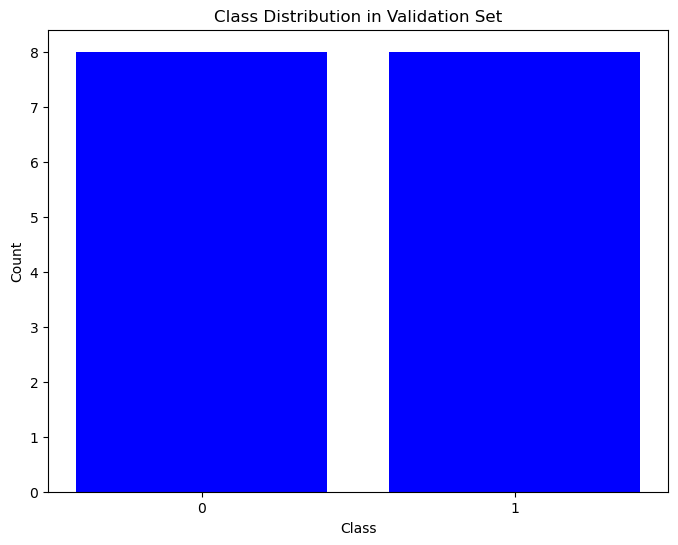

In [4]:
# Defining a function to plot the distribution of the datasets

def plot_class_distribution(class_counts_dict, set_name):
    classes = list(class_counts_dict.keys())
    counts = list(class_counts_dict.values())

    plt.figure(figsize=(8, 6))
    plt.bar(classes, counts, color='blue')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title(f'Class Distribution in {set_name} Set')
    plt.xticks(classes)
    plt.show()

# Plot the class distribution for each set
plot_class_distribution(train_class_counts_dict, 'Training')
plot_class_distribution(test_class_counts_dict, 'Test')
plot_class_distribution(val_class_counts_dict, 'Validation')


Looking at the whole dataset, there is a total of 5856 images. The training set contains 5216 images, the validation set contains 16 images and the test set contains 624 images. 

- The training set has 3875 images labeled with pneumonia while having 1341 labeled as normal/without pneumonia. This image set seems to have an imbalanced class distribution since there are a long more images with pneumonia. 
- The validation set has small number of images for both classes with 8 images labeled with pneumonia while having 8 labeled as normal/without pneumonia. This could potentially affect the model's ability to generalize effectively.
- The test set has 390 images labeled with pneumonia while having 234 labeled as normal/without pneumonia. This image appears to have a more balanced distribution in comparison to the training set. Even though the the pneumonia images count is still higher than the images without pneumonia, the difference is not as vast as the training set. 

### Previewing Images

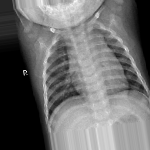

In [5]:
# Viewing image from train group
array_to_img(train_images[10])


In [6]:
# Example image without pneumonia
print(train_labels[10])

0.0


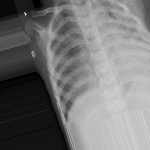

In [7]:
array_to_img(train_images[12])

In [8]:
# Example image with pneumonia
print(train_labels[12])

1.0


## Modeling

## Hyperparamater Tuning 

## Model Evaluation

## Conclusion and Recommendations

## Limitations

# Building baseline neural network model

In [9]:
# Directory path
train_dir = 'chest_xray/train/'
test_dir = 'chest_xray/test/'
val_dir = 'chest_xray/val/'

# Preprocess the images into tensors
# Rescale the data by 1/.255 and use binary_crossentropy loss

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Get all the data in the directory chest_xray/train (5216 images) and reshape them
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150), batch_size=5216, class_mode='binary')

# Get all the data in the directory chest_xray/test (624 images) , and reshape them
test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size=(150, 150), batch_size=624, class_mode='binary')


# Get all the data in the directory chest_xray/val (16 images), and reshape them
val_generator = val_datagen.flow_from_directory(
        val_dir, 
        target_size=(150, 150), batch_size=16, class_mode='binary')

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


### Handling Class Imbalance

# Utilizing class weights to help adjust and increase importance of underepresented class
# Will pass class_weight=class_weights_dict to the fit function

class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights_dict = dict(enumerate(class_weights))

## Inspect and Prepare Data

### Viewing some images from the datasets 

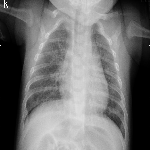

In [10]:
# Datasets are now six numpy arrays 

# Viewing image from train group

array_to_img(train_images[10])

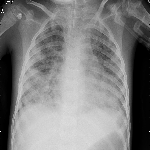

In [11]:
array_to_img(train_images[130])

In [12]:
sample_image = train_images[0]
sample_image

array([[[0.07058824, 0.07058824, 0.07058824],
        [0.07058824, 0.07058824, 0.07058824],
        [0.06666667, 0.06666667, 0.06666667],
        ...,
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.07058824, 0.07058824, 0.07058824],
        [0.08235294, 0.08235294, 0.08235294]],

       [[0.07058824, 0.07058824, 0.07058824],
        [0.07058824, 0.07058824, 0.07058824],
        [0.06666667, 0.06666667, 0.06666667],
        ...,
        [0.05882353, 0.05882353, 0.05882353],
        [0.05882353, 0.05882353, 0.05882353],
        [0.07843138, 0.07843138, 0.07843138]],

       [[0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.05882353, 0.05882353, 0.05882353],
        ...,
        [0.04313726, 0.04313726, 0.04313726],
        [0.0509804 , 0.0509804 , 0.0509804 ],
        [0.0627451 , 0.0627451 , 0.0627451 ]],

       ...,

       [[0.14901961, 0.14901961, 0.14901961],
        [0.17254902, 0.17254902, 0.17254902],
        [0.20784315, 0

In [13]:
# Previewing sample label
sample_label = train_labels[0]
sample_label

1.0

In [14]:
# Get value counts
unique_elements, counts = np.unique(train_labels, return_counts=True)

# Combine the unique elements and their counts into a dictionary and 
value_counts_dict = dict(zip(unique_elements, counts))
print(value_counts_dict)

{0.0: 1341, 1.0: 3875}


Training set contains 1341 individuals classfied as normal and 3875 individuals classified with pneumonia

In [15]:
# Previewing shape of each dataset

print("Image Dataset Shape")
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)

print("Label Dataset Shape")
print(train_labels.shape)
print(test_labels.shape)
print(val_labels.shape)



Image Dataset Shape
(5216, 150, 150, 3)
(624, 150, 150, 3)
(16, 150, 150, 3)
Label Dataset Shape
(5216,)
(624,)
(16,)


In [16]:
# Reshaping image datasets
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5216, 67500)
(624, 67500)
(16, 67500)


In [18]:
# Reshaping labels
train_y = np.reshape(train_labels, (5216,1))
test_y = np.reshape(test_labels, (624,1))
val_y = np.reshape(val_labels, (16,1))

print(train_y.shape)
print(test_y.shape)
print(val_y.shape)

(5216, 1)
(624, 1)
(16, 1)


In [19]:
# Viewing first 10 labels
train_y[:10]

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [20]:
# Viewing class indices
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

Upon viewing the class indices we can see that those classified as normal are indicated by a 0 and those classified as having pneumonia, are indicated with a 1. 

### Building Model 

In [21]:
# Initial baseline model

model_1 = Sequential()
model_1.add(Dense(12, activation='relu', input_shape=(67500,)))
model_1.add(Dense(8, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [22]:
# Compiling model with following parameters
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [23]:
# Inspecting model summary

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                810012    
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 810,125
Trainable params: 810,125
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Fitting the model to the training data
results_1 = model_1.fit(train_img, train_y, 
                        epochs=10, 
                        batch_size=32, 
                        validation_data=(val_img, val_y))

Epoch 1/10
163/163 [==============================] - 11s 53ms/step - loss: 1.0072 - accuracy: 0.8516 - val_loss: 0.6810 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 4s 23ms/step - loss: 0.1901 - accuracy: 0.9273 - val_loss: 0.2608 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 4s 23ms/step - loss: 0.1539 - accuracy: 0.9400 - val_loss: 0.2576 - val_accuracy: 0.8125
Epoch 4/10
163/163 [==============================] - 4s 26ms/step - loss: 0.2291 - accuracy: 0.9229 - val_loss: 1.0701 - val_accuracy: 0.6875
Epoch 5/10
163/163 [==============================] - 5s 28ms/step - loss: 0.1712 - accuracy: 0.9411 - val_loss: 0.4227 - val_accuracy: 0.8125
Epoch 6/10
163/163 [==============================] - 4s 26ms/step - loss: 0.1262 - accuracy: 0.9532 - val_loss: 0.6300 - val_accuracy: 0.7500
Epoch 7/10
163/163 [==============================] - 4s 22ms/step - loss: 0.1694 - accuracy: 0.9423 - val_loss: 0.6588 - val_accuracy: 0.812

In [25]:
# Training Results 
results_train = model_1.evaluate(train_img, train_y)

# Test Results 

results_test = model_1.evaluate(test_img, test_y)

20/20 [==============================] - 1s 19ms/step - loss: 0.9305 - accuracy: 0.7724


In [26]:
print('Train Results:', results_train)
print('Test Results:', results_test)

Train Results: [0.07408176362514496, 0.9714340567588806]
Test Results: [0.930457592010498, 0.7724359035491943]


Initial model shows accuracy of 97% with training group and 77%% with the test group. Not the best performing model and does seem to over fit some due to training score being higher than test score. 

### Visualizing loss and accuracy curves

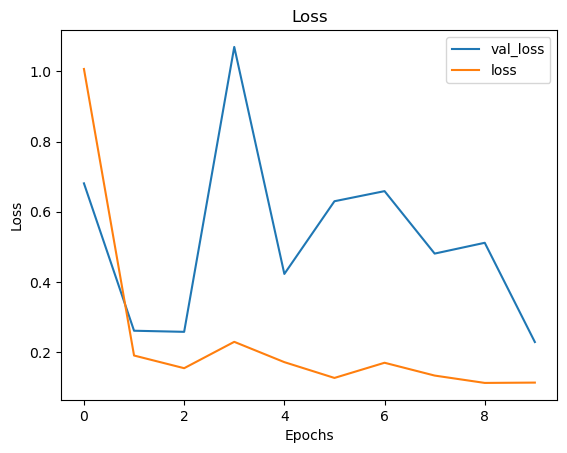

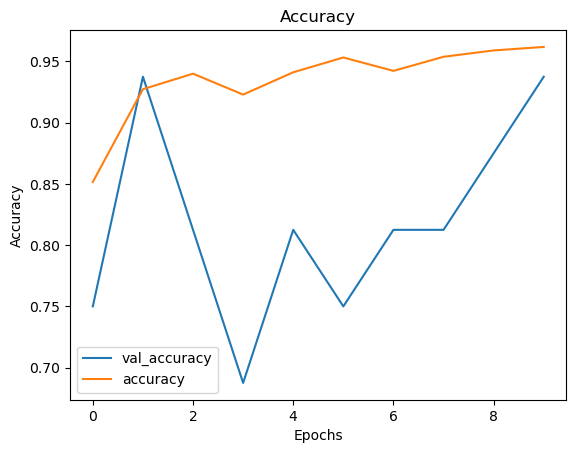

In [27]:
# Creating function to plot loss and accuracy curves

def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

# Viewing results 
visualize_training_results(results_1)

We can see by the graph that after the first Epoch, our loss tends to stabilize for the most part in both sets. In regards to accuracy there is no defined point/ epoch number as accuracy remains consistent. 

In [ ]:
# Model 2 with adjusted parameters

model_2 = Sequential()
model_2.add(Dense(12, activation='relu', input_shape=(67500,)))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

# Compiling model with following parameters
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Inspecting model summary

model_2.summary()

# Fitting the model to the training data
results_2 = model_2.fit(train_img, train_y, 
                        epochs=10, 
                        batch_size=32, 
                        validation_data=(val_img, val_y))

### Building a Bigger Model 

# Initial baseline model

model_2 = Sequential()
model_2.add(Dense(64, activation='tanh', input_shape=(67500,)))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(1, activation='sigmoid'))

# Compiling model with following parameters
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Inspecting model summary
model_2.summary()

# Fitting the model to the training data
results_2 = model_2.fit(train_img, train_y, 
                        epochs=5, 
                        batch_size=64, 
                        validation_data=(val_img, val_y))

# Training Results 
results2_train = model_2.evaluate(train_img, train_y)

# Test Results 

results2_test = model_2.evaluate(test_img, test_y)

print('Train Results:', results2_train)
print('Test Results:', results2_test)

# Viewing results 
visualize_training_results(results_2)

In [20]:
# Second model with additional layer

model_2 = Sequential()
model_2.add(Dense(64, activation='tanh', input_shape=(67500,)))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(1, activation='sigmoid'))

# Compiling model 
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
# Inspecting model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                4320064   
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,322,177
Trainable params: 4,322,177
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Fitting the model to the training data
results_2 = model_2.fit(train_img, train_y, 
                        epochs=5, 
                        batch_size=64, 
                        validation_data=(val_img, val_y))

Epoch 1/5
82/82 [==============================] - 13s 139ms/step - loss: 0.6736 - accuracy: 0.7429 - val_loss: 0.8668 - val_accuracy: 0.5000
Epoch 2/5
82/82 [==============================] - 11s 128ms/step - loss: 0.5733 - accuracy: 0.7429 - val_loss: 0.8355 - val_accuracy: 0.5000
Epoch 3/5
82/82 [==============================] - 12s 138ms/step - loss: 0.5725 - accuracy: 0.7429 - val_loss: 0.8428 - val_accuracy: 0.5000
Epoch 4/5
82/82 [==============================] - 10s 126ms/step - loss: 0.5712 - accuracy: 0.7429 - val_loss: 0.8547 - val_accuracy: 0.5000
Epoch 5/5
82/82 [==============================] - 11s 132ms/step - loss: 0.5732 - accuracy: 0.7429 - val_loss: 0.8082 - val_accuracy: 0.5000


In [23]:
# Training Results 
results2_train = model_2.evaluate(train_img, train_y)

# Test Results 
results2_test = model_2.evaluate(test_img, test_y)

print('Train Results:', results2_train)
print('Test Results:', results2_test)

20/20 [==============================] - 0s 19ms/step - loss: 0.6860 - accuracy: 0.6250
Train Results: [0.5706666111946106, 0.7429064512252808]
Test Results: [0.685958206653595, 0.625]


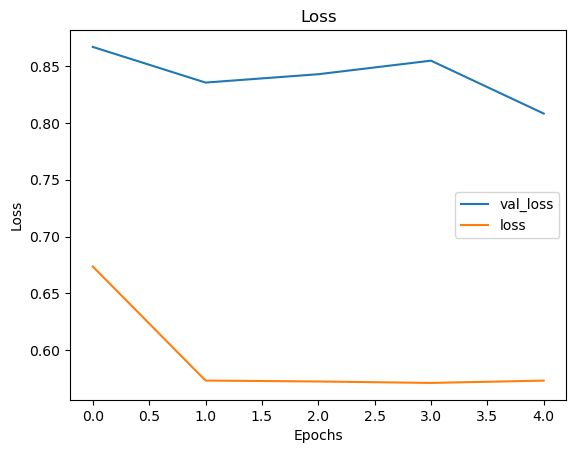

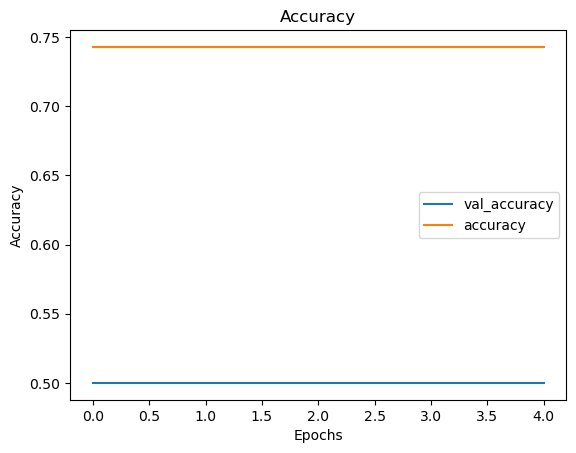

In [24]:
# Viewing results 
visualize_training_results(results_2)

With the second mondel, there was no real difference in accuracy performance or loss. 

### Building Third Model 

This model will incorporate a little additional tuning by changing the activation function. 

In [25]:
# Third model

model_3 = Sequential()
model_3.add(Dense(64, activation='relu', input_shape=(67500,)))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

# Compiling model with following parameters
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [26]:
# Inspecting model summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                4320064   
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,322,177
Trainable params: 4,322,177
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Fitting the model to the training data
results_3 = model_3.fit(train_img, train_y, 
                        epochs=5, 
                        batch_size=64, 
                        validation_data=(val_img, val_y))


Epoch 1/5
82/82 [==============================] - 12s 134ms/step - loss: 1.1811 - accuracy: 0.7770 - val_loss: 0.8619 - val_accuracy: 0.6875
Epoch 2/5
82/82 [==============================] - 11s 131ms/step - loss: 0.1982 - accuracy: 0.9214 - val_loss: 0.7443 - val_accuracy: 0.6875
Epoch 3/5
82/82 [==============================] - 12s 140ms/step - loss: 0.1474 - accuracy: 0.9448 - val_loss: 0.7747 - val_accuracy: 0.7500
Epoch 4/5
82/82 [==============================] - 11s 137ms/step - loss: 0.1703 - accuracy: 0.9316 - val_loss: 0.2142 - val_accuracy: 0.9375
Epoch 5/5
82/82 [==============================] - 11s 133ms/step - loss: 0.1459 - accuracy: 0.9406 - val_loss: 0.3569 - val_accuracy: 0.8125


In [28]:
# Training Results 
results3_train = model_3.evaluate(train_img, train_y)

# Test Results 
results3_test = model_3.evaluate(test_img, test_y)

print('Train Results:', results3_train)
print('Test Results:', results3_test)


20/20 [==============================] - 0s 20ms/step - loss: 0.7846 - accuracy: 0.7356
Train Results: [0.10683000087738037, 0.9603143930435181]
Test Results: [0.7845523357391357, 0.7355769276618958]


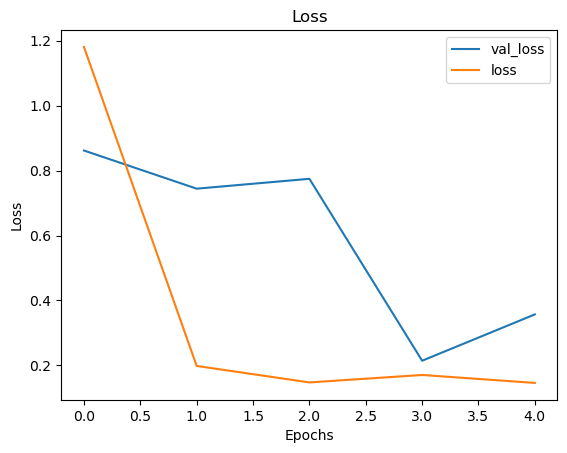

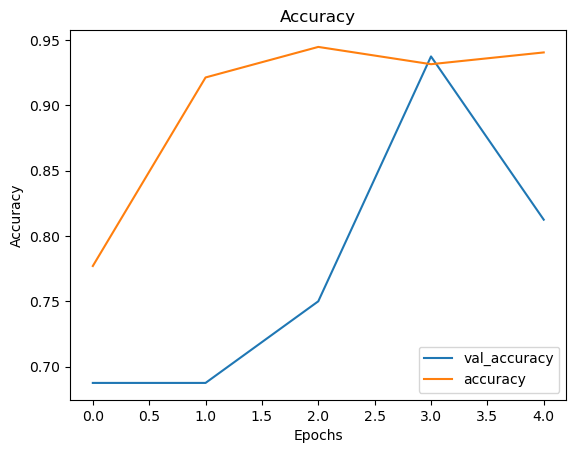

In [29]:
# Viewing results 
visualize_training_results(results_3)

Looking at the results we see that training accuracy improved up to 96.3% and test accuracy improved to 75.3%. With the training score being higher than the test score, we can see that the model is overfitting. More tuning or adjustments will be tried to see if this can be improved.

### Fourth Model with tuning to increase number of epochs

# Fourth model
# Tuning by increasing number of epochs to 20

model_4 = Sequential()
model_4.add(Dense(64, activation='relu', input_shape=(67500,)))
model_4.add(Dense(32, activation='relu'))
model_4.add(Dense(1, activation='sigmoid'))

# Compiling model with following parameters
model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Inspecting model summary
model_4.summary()

# Fitting the model to the training data
results_4 = model_4.fit(train_img, train_y, 
                        epochs=20, 
                        batch_size=64, 
                        validation_data=(val_img, val_y))

# Training Results 
results4_train = model_4.evaluate(train_img, train_y)

# Test Results 
results4_test = model_4.evaluate(test_img, test_y)

print('Train Results:', results4_train)
print('Test Results:', results4_test)

# Viewing results 
visualize_training_results(results_4)

In [30]:
# Fourth model
# Tuning by increasing number of epochs to 10

model_4 = Sequential()
model_4.add(Dense(64, activation='relu', input_shape=(67500,)))
model_4.add(Dense(32, activation='relu'))
model_4.add(Dense(1, activation='sigmoid'))

# Compiling model with following parameters
model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Inspecting model summary
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                4320064   
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,322,177
Trainable params: 4,322,177
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Fitting the model to the training data
results_4 = model_4.fit(train_img, train_y, 
                        epochs=10, 
                        batch_size=64, 
                        validation_data=(val_img, val_y))

Epoch 1/10
82/82 [==============================] - 14s 152ms/step - loss: 1.1465 - accuracy: 0.8322 - val_loss: 0.5752 - val_accuracy: 0.8125
Epoch 2/10
82/82 [==============================] - 11s 130ms/step - loss: 0.2638 - accuracy: 0.9055 - val_loss: 0.7889 - val_accuracy: 0.8125
Epoch 3/10
82/82 [==============================] - 10s 120ms/step - loss: 0.3257 - accuracy: 0.9022 - val_loss: 0.7594 - val_accuracy: 0.7500
Epoch 4/10
82/82 [==============================] - 11s 134ms/step - loss: 0.1810 - accuracy: 0.9381 - val_loss: 0.1457 - val_accuracy: 0.9375
Epoch 5/10
82/82 [==============================] - 11s 128ms/step - loss: 0.2498 - accuracy: 0.9239 - val_loss: 0.7972 - val_accuracy: 0.7500
Epoch 6/10
82/82 [==============================] - 10s 126ms/step - loss: 0.1838 - accuracy: 0.9383 - val_loss: 0.1705 - val_accuracy: 0.9375
Epoch 7/10
82/82 [==============================] - 10s 123ms/step - loss: 0.2427 - accuracy: 0.9233 - val_loss: 1.6350 - val_accuracy: 0.5000

In [32]:
# Training Results 
results4_train = model_4.evaluate(train_img, train_y)

# Test Results 
results4_test = model_4.evaluate(test_img, test_y)

print('Train Results:', results4_train)
print('Test Results:', results4_test)

20/20 [==============================] - 1s 24ms/step - loss: 2.0172 - accuracy: 0.6939
Train Results: [0.1531635969877243, 0.9507285356521606]
Test Results: [2.017235517501831, 0.6939102411270142]


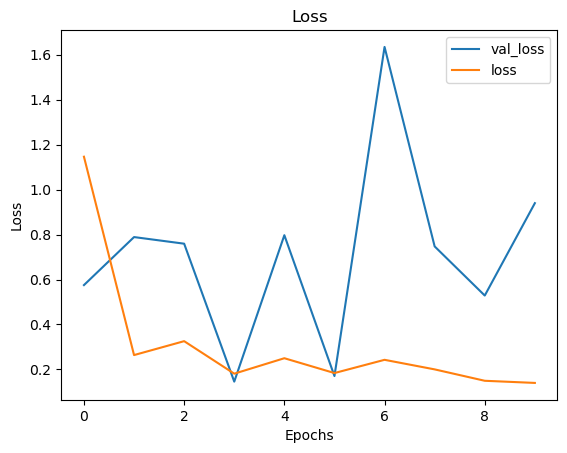

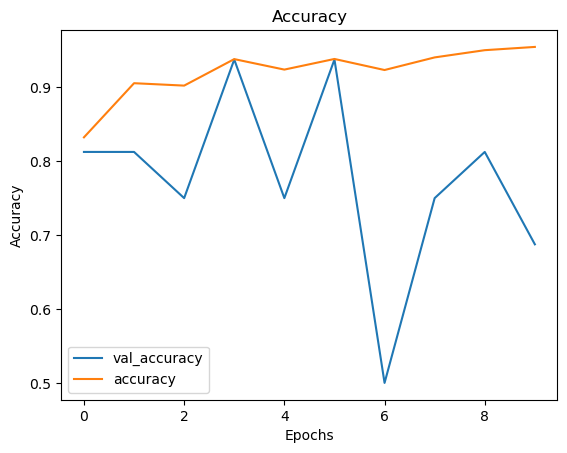

In [33]:
# Viewing results 
visualize_training_results(results_4)

Looking at the results we see that training accuracy remained similar with a value of 96.2%, however test accuracy decreased to 71.0%. The model is still overfitting. May reduce model complexity in next iteration by reducing number of neurons in each layer.

### Fifth Model with reduced neurons in each layer 

In [34]:
# Fifth model
# Tuning by decreasing neurons to decrease model complexity but increasing epochs to 20

model_5 = Sequential()
model_5.add(Dense(32, activation='relu', input_shape=(67500,)))
model_5.add(Dense(16, activation='relu'))
model_5.add(Dense(1, activation='sigmoid'))

# Compiling model with following parameters
model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Inspecting model summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 32)                2160032   
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,160,577
Trainable params: 2,160,577
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Fitting the model to the training data
results_5 = model_5.fit(train_img, train_y, 
                        epochs=20, 
                        batch_size=64, 
                        validation_data=(val_img, val_y))

Epoch 1/20
82/82 [==============================] - 8s 83ms/step - loss: 0.5634 - accuracy: 0.8451 - val_loss: 1.7715 - val_accuracy: 0.5000
Epoch 2/20
82/82 [==============================] - 6s 75ms/step - loss: 0.2185 - accuracy: 0.9222 - val_loss: 0.1882 - val_accuracy: 0.9375
Epoch 3/20
82/82 [==============================] - 7s 81ms/step - loss: 0.1755 - accuracy: 0.9375 - val_loss: 0.8770 - val_accuracy: 0.6250
Epoch 4/20
82/82 [==============================] - 6s 74ms/step - loss: 0.4609 - accuracy: 0.8892 - val_loss: 1.5143 - val_accuracy: 0.7500
Epoch 5/20
82/82 [==============================] - 7s 79ms/step - loss: 0.1791 - accuracy: 0.9452 - val_loss: 0.2340 - val_accuracy: 0.9375
Epoch 6/20
82/82 [==============================] - 6s 74ms/step - loss: 0.1887 - accuracy: 0.9411 - val_loss: 0.1341 - val_accuracy: 0.9375
Epoch 7/20
82/82 [==============================] - 6s 71ms/step - loss: 0.1645 - accuracy: 0.9484 - val_loss: 1.8392 - val_accuracy: 0.5625
Epoch 8/20
82

In [36]:
# Training Results 
results5_train = model_5.evaluate(train_img, train_y)

# Test Results 
results5_test = model_5.evaluate(test_img, test_y)

print('Train Results:', results5_train)
print('Test Results:', results5_test)


20/20 [==============================] - 1s 36ms/step - loss: 0.5724 - accuracy: 0.8125
Train Results: [0.16544681787490845, 0.9386503100395203]
Test Results: [0.5724060535430908, 0.8125]


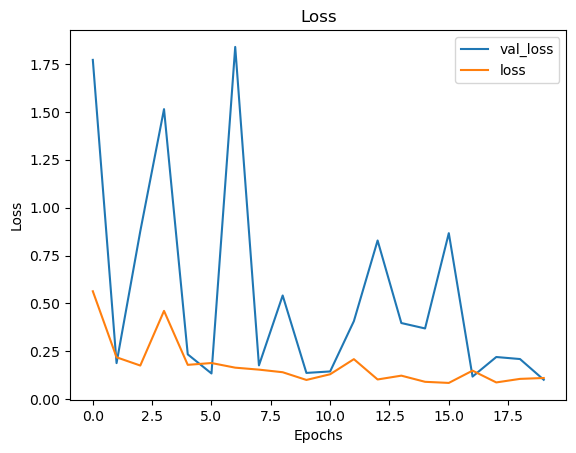

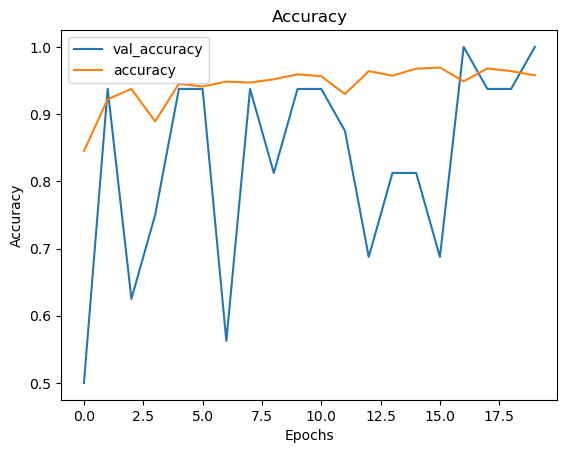

In [37]:
# Viewing results 
visualize_training_results(results_5)

With the fifth model, epochs were increased to 20 and neurons in the first two layers were decreased by half. Model performance improved and currently this has been the best performing model. 
- Train Accuracy: 96.9%
- Test Accuracy: 79.6%

Accuracy improved for both training and test sets, however model still is showing signs of overfitting. 

# Utilizing Data Augmentation to increase number of samples for smaller sets

datagen = ImageDataGenerator(rotation_range=20, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True)

# Create a generator for augmented data
augmented_train_data = datagen.flow(train_images, train_labels, batch_size=64)

# Use augmented data for training
model.fit(augmented_train_data, epochs=5, validation_data=(val_images, val_labels))


# Fitting the model 

#class_weights = {0: 1, 1: 5}  # Adjust weights based on the class distribution

results_1 = model_1.fit(train_images_reshaped, train_labels_final, 
                        epochs=5, 
                        batch_size=64, 
                        validation_data=(val_images_reshaped, val_labels_final))

  #                      class_weight= class_weights)

# Building CNN Model

In [38]:
# Datasets 
#train_images, train_labels = next(train_generator)
#test_images, test_labels = next(test_generator)
#val_images, val_labels = next(val_generator)

In [39]:
# Build a baseline fully connected model

from keras import models
from keras import layers
np.random.seed(123)
connected_baseline_model = models.Sequential()
connected_baseline_model.add(layers.Dense(20, activation='relu', input_shape=(67500,)))
connected_baseline_model.add(layers.Dense(7, activation='relu'))
connected_baseline_model.add(layers.Dense(5, activation='relu'))
connected_baseline_model.add(layers.Dense(1, activation='sigmoid'))

In [40]:
connected_baseline_model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_connected = connected_baseline_model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Epoch 1/50
163/163 [==============================] - 6s 29ms/step - loss: 0.5137 - accuracy: 0.7540 - val_loss: 0.8662 - val_accuracy: 0.5625
Epoch 2/50
163/163 [==============================] - 4s 24ms/step - loss: 0.3536 - accuracy: 0.8562 - val_loss: 0.8192 - val_accuracy: 0.6250
Epoch 3/50
163/163 [==============================] - 5s 28ms/step - loss: 0.2654 - accuracy: 0.8901 - val_loss: 0.8189 - val_accuracy: 0.6875
Epoch 4/50
163/163 [==============================] - 4s 23ms/step - loss: 0.2351 - accuracy: 0.9053 - val_loss: 1.2902 - val_accuracy: 0.5625
Epoch 5/50
163/163 [==============================] - 4s 24ms/step - loss: 0.2115 - accuracy: 0.9170 - val_loss: 0.5989 - val_accuracy: 0.7500
Epoch 6/50
163/163 [==============================] - 4s 25ms/step - loss: 0.1806 - accuracy: 0.9339 - val_loss: 0.5673 - val_accuracy: 0.8125
Epoch 7/50
163/163 [==============================] - 4s 23ms/step - loss: 0.1830 - accuracy: 0.9298 - val_loss: 0.3077 - val_accuracy: 0.9375

In [41]:
# Evaluating the model 
connected_results_train = connected_baseline_model.evaluate(train_img, train_y)

connected_results_test = connected_baseline_model.evaluate(test_img, test_y)

20/20 [==============================] - 0s 20ms/step - loss: 1.1472 - accuracy: 0.7212


In [42]:
# Reviewing train and test results 
print("Train Accuracy: ", connected_results_train)
print("Test Accuracy: ", connected_results_test)

Train Accuracy:  [0.07773678749799728, 0.9723926186561584]
Test Accuracy:  [1.1471761465072632, 0.7211538553237915]


With the baseline densely connected network model, we obtained a training accuracy of 97% and a test set accuracy of 72.7%. With a higher training accuracy, we see that the model is overfitting. 

## Model 2: CNN Model

In [43]:
# Building the CNN

cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150 ,150,  3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Conv2D(32, (4, 4), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(1, activation='sigmoid'))

cnn_model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [44]:
# Fitting the model 
cnn_history = cnn_model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Epoch 1/30
163/163 [==============================] - 232s 1s/step - loss: 0.5037 - acc: 0.7690 - val_loss: 0.6478 - val_acc: 0.6250
Epoch 2/30
163/163 [==============================] - 216s 1s/step - loss: 0.3371 - acc: 0.8650 - val_loss: 0.8487 - val_acc: 0.6250
Epoch 3/30
163/163 [==============================] - 231s 1s/step - loss: 0.2372 - acc: 0.9055 - val_loss: 0.6987 - val_acc: 0.6250
Epoch 4/30
163/163 [==============================] - 227s 1s/step - loss: 0.1849 - acc: 0.9258 - val_loss: 0.4925 - val_acc: 0.7500
Epoch 5/30
163/163 [==============================] - 211s 1s/step - loss: 0.1579 - acc: 0.9390 - val_loss: 0.3608 - val_acc: 0.8750
Epoch 6/30
163/163 [==============================] - 216s 1s/step - loss: 0.1438 - acc: 0.9450 - val_loss: 0.3926 - val_acc: 0.8125
Epoch 7/30
163/163 [==============================] - 224s 1s/step - loss: 0.1301 - acc: 0.9515 - val_loss: 0.6008 - val_acc: 0.6875
Epoch 8/30
163/163 [==============================] - 233s 1s/step - 

In [45]:
train_img.shape

(5216, 67500)

In [46]:
train_images.shape

(5216, 150, 150, 3)

In [47]:
# Evaluating the model 
# Used train_images and test_images instead of train_img and test_img 
# because CNN expects 4D input
cnn_results_train = cnn_model.evaluate(train_images, train_y)

cnn_results_test = cnn_model.evaluate(test_images, test_y)

20/20 [==============================] - 6s 272ms/step - loss: 1.3047 - acc: 0.7564


In [48]:
# Reviewing train and test results 
print("Train Accuracy: ", cnn_results_train)
print("Test Accuracy: ", cnn_results_test)

Train Accuracy:  [0.03409786522388458, 0.9884969592094421]
Test Accuracy:  [1.3046544790267944, 0.7564102411270142]


The CNN model performance slightly improved over the previous connected model with a training accuracy of 98.3 % and a test accuracy of 73.3%. The model does still show signs of overfitting with the training performance being much higher than the test performance 

In [49]:
# Will need to tune and adjust to see if we can improve overfitting
# Regularization, Activation Functions, Batch Size and Learning Rate, Data Agumentation 
# Transfer Learning? Learning Rate Schedulers, Early Stopping, Drop Out Layers to model

# CNN with added Dropout Layers

In [52]:
#CNN with dropout layers 

cnn_model2 = models.Sequential()
cnn_model2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150 ,150,  3)))
cnn_model2.add(layers.MaxPooling2D((2, 2)))
cnn_model2.add(layers.Dropout(0.2))


cnn_model2.add(layers.Conv2D(32, (4, 4), activation='relu'))
cnn_model2.add(layers.MaxPooling2D((2, 2)))
cnn_model2.add(layers.Dropout(0.2))


cnn_model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model2.add(layers.MaxPooling2D((2, 2)))
cnn_model2.add(layer.Dropout(0.2))

cnn_model2.add(layers.Flatten())
cnn_model2.add(layers.Dense(64, activation='relu'))
cnn_model2.add(layers.Dense(1, activation='sigmoid'))

cnn_model2.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])




In [53]:
# Fitting the model 
cnn_history2 = cnn_model2.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Epoch 1/30
163/163 [==============================] - 233s 1s/step - loss: 0.5260 - acc: 0.7538 - val_loss: 0.7021 - val_acc: 0.5625
Epoch 2/30
163/163 [==============================] - 217s 1s/step - loss: 0.3497 - acc: 0.8461 - val_loss: 0.6048 - val_acc: 0.6250
Epoch 3/30
163/163 [==============================] - 219s 1s/step - loss: 0.2361 - acc: 0.9053 - val_loss: 0.6956 - val_acc: 0.5625
Epoch 4/30
163/163 [==============================] - 215s 1s/step - loss: 0.1973 - acc: 0.9212 - val_loss: 0.4751 - val_acc: 0.8750
Epoch 5/30
163/163 [==============================] - 207s 1s/step - loss: 0.1776 - acc: 0.9268 - val_loss: 0.4878 - val_acc: 0.7500
Epoch 6/30
163/163 [==============================] - 217s 1s/step - loss: 0.1674 - acc: 0.9331 - val_loss: 0.6718 - val_acc: 0.6250
Epoch 7/30
163/163 [==============================] - 218s 1s/step - loss: 0.1634 - acc: 0.9379 - val_loss: 0.6223 - val_acc: 0.6875
Epoch 8/30
163/163 [==============================] - 219s 1s/step - 

In [56]:
cnn2_results_train = cnn_model2.evaluate(train_images, train_y)

163/163 [==============================] - 27s 167ms/step - loss: 0.0854 - acc: 0.9705


In [57]:
cnn2_results_test = cnn_model2.evaluate(test_images, test_y)

20/20 [==============================] - 3s 144ms/step - loss: 0.6060 - acc: 0.8045


In [55]:
# Reviewing train and test results 
print("Train Accuracy: ", cnn2_results_train)
print("Test Accuracy: ", cnn2_results_test)

Train Accuracy:  [0.0854499563574791, 0.970475435256958]
Test Accuracy:  [0.6059843897819519, 0.8044871687889099]


This drop out tuned model performed better than the previous model in respect to the issue of overfitting. Training accuracy was 97.1 % and test accuracy was 80.5%. While training performance slightly decreased, test performance did improve. The model still does show signs of overfitting so will continue to tune and find optimal parameters.

# CNN with dropout and batch normalization

In [60]:
#CNN with dropout layers and batch normalization

cnn_model3 = models.Sequential()
cnn_model3.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150 ,150,  3)))
cnn_model3.add(layers.BatchNormalization())
cnn_model3.add(layers.MaxPooling2D((2, 2)))
cnn_model3.add(layers.Dropout(0.2))


cnn_model3.add(layers.Conv2D(32, (4, 4), activation='relu'))
cnn_model3.add(layers.BatchNormalization())
cnn_model3.add(layers.MaxPooling2D((2, 2)))
cnn_model3.add(layers.Dropout(0.2))


cnn_model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model3.add(layers.BatchNormalization())
cnn_model3.add(layers.MaxPooling2D((2, 2)))
cnn_model3.add(layers.Dropout(0.2))

cnn_model3.add(layers.Flatten())
cnn_model3.add(layers.Dense(64, activation='relu'))
cnn_model3.add(layers.Dense(1, activation='sigmoid'))

cnn_model3.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])



In [61]:
# Fitting the model 
cnn_history3 = cnn_model3.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Epoch 1/30
163/163 [==============================] - 393s 2s/step - loss: 0.2491 - acc: 0.9170 - val_loss: 0.7210 - val_acc: 0.5625
Epoch 2/30
163/163 [==============================] - 369s 2s/step - loss: 0.0945 - acc: 0.9641 - val_loss: 2.7393 - val_acc: 0.5000
Epoch 3/30
163/163 [==============================] - 326s 2s/step - loss: 0.0747 - acc: 0.9712 - val_loss: 1.2984 - val_acc: 0.5625
Epoch 4/30
163/163 [==============================] - 360s 2s/step - loss: 0.0642 - acc: 0.9764 - val_loss: 1.8016 - val_acc: 0.5000
Epoch 5/30
163/163 [==============================] - 352s 2s/step - loss: 0.0591 - acc: 0.9789 - val_loss: 0.7055 - val_acc: 0.5625
Epoch 6/30
163/163 [==============================] - 345s 2s/step - loss: 0.0515 - acc: 0.9803 - val_loss: 1.0862 - val_acc: 0.5625
Epoch 7/30
163/163 [==============================] - 357s 2s/step - loss: 0.0443 - acc: 0.9833 - val_loss: 0.2230 - val_acc: 0.9375
Epoch 8/30
163/163 [==============================] - 359s 2s/step - 

In [62]:
cnn3_results_train = cnn_model3.evaluate(train_images, train_y)
cnn3_results_test = cnn_model3.evaluate(test_images, test_y)


20/20 [==============================] - 6s 277ms/step - loss: 1.1305 - acc: 0.8157


In [63]:
# Reviewing train and test results 
print("Train Accuracy: ", cnn3_results_train)
print("Test Accuracy: ", cnn3_results_test)

Train Accuracy:  [0.00886904913932085, 0.9975076913833618]
Test Accuracy:  [1.1304645538330078, 0.8157051205635071]


# Adding additional layers 

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))